In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [63]:
directory = r'Fixations\WithRecordingTime'
selected_columns = ['Recording timestamp', 'Gaze point X', 'Gaze point Y','participant no','way','alert']
dataframes = []

In [64]:
for filename in os.listdir(directory):
    if filename.endswith('_output.csv') and filename.startswith('c'):  
        file_path = os.path.join(directory, filename)
        # Read the CSV file
        print(filename)
        df = pd.read_csv(file_path, usecols=selected_columns)
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all DataFrames in the list
final_df = pd.concat(dataframes, ignore_index=True)

# Optionally, save the final DataFrame to a new CSV file
final_df.to_csv('Fixations\WithRecordingTime\gaze_points_cyc_output.csv', index=False)

# Print the head of the final DataFrame to verify
print(final_df.head())

c10_output.csv
c2_output.csv
c3_output.csv
c4_output.csv
c5_output.csv
c6_output.csv
c7_output.csv
c8_output.csv
   Recording timestamp  Gaze point X  Gaze point Y participant no       way  \
0               119002           NaN           NaN            c10  overtake   
1               119002           NaN           NaN            c10  overtake   
2               119011           NaN           NaN            c10  overtake   
3               119011           NaN           NaN            c10  overtake   
4               119015         941.0         642.0            c10  overtake   

   alert  
0  voice  
1  voice  
2  voice  
3  voice  
4  voice  


In [2]:
df_merged_gaze=pd.read_csv(r'Fixations\WithRecordingTime\gaze_points_cyc_output.csv')
df_merged_gaze =df_merged_gaze.dropna()

In [67]:
grouped_counts = df_merged_gaze.groupby(['participant no', 'way', 'alert']).size().reset_index(name='Count')

# Print the resulting DataFrame
print(grouped_counts)
grouped_counts.to_csv(r'Fixations\WithRecordingTime\fixation_count_cyc.csv', index=False)

   participant no       way      alert  Count
0             c10  approach       bell    292
1             c10  approach  continue     287
2             c10  approach    control    305
3             c10  approach      flash    288
4             c10  approach      voice    308
..            ...       ...        ...    ...
75             c8  overtake       bell    241
76             c8  overtake  continue     278
77             c8  overtake    control    295
78             c8  overtake      flash    314
79             c8  overtake      voice    286

[80 rows x 4 columns]


In [5]:
df_ped_fixations=pd.read_csv(r'Fixations\WithRecordingTime\fixation_count_peds.csv')
df_cyc_fixations=pd.read_csv(r'Fixations\WithRecordingTime\fixation_count_cyc.csv')

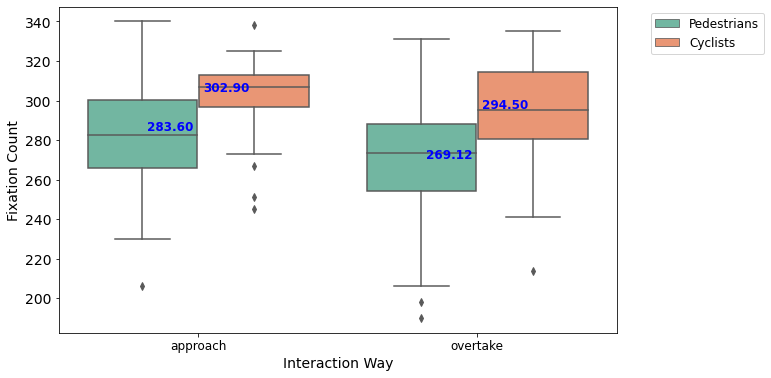

In [14]:
df_ped_fixations['group'] = 'Pedestrians'
df_cyc_fixations['group'] = 'Cyclists'

# Combine both dataframes
df_combined = pd.concat([df_ped_fixations, df_cyc_fixations])

plt.rcParams.update({
    'font.size': 12,      # Set font size for all text
    'font.family': 'sans-serif',  # Change the font family (e.g., 'serif', 'sans-serif', etc.)
    'axes.titlesize': 16,    # Font size for title
    'axes.labelsize': 14,    # Font size for x and y labels
    'xtick.labelsize': 12,   # Font size for x ticks
    'ytick.labelsize': 14,   # Font size for y ticks
    'legend.fontsize': 12    # Font size for the legend
})


# Create the boxplot
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x='way', y='Count', hue='group', data=df_combined, palette="Set2")

# Calculate means for both pedestrian and cyclist fixations and add text
mean_values = df_combined.groupby(['way', 'group'])['Count'].mean().reset_index()

# Add mean values as text annotations on the plot
for i, row in mean_values.iterrows():
    x_pos = list(df_combined['way'].unique()).index(row['way']) + (0.1 if row['group'] == 'Cyclists' else -0.1)
    plt.text(x_pos, row['Count'], f'{row["Count"]:.2f}', color='blue', ha="center", va="bottom", fontweight='bold')

# Set plot title and labels
#plt.title('Number of Fixations: Pedestrians and Cyclists')
plt.xlabel('Interaction Way')
plt.ylabel('Fixation Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()